## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [9]:

import pandas as pd
#pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

import numpy as np

#NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.

import matplotlib.pyplot as plt
#matplotlib is  used for visualization 

import seaborn as sns
#Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures


Next we're going to import the data file. If your file is a csv you can import the file using pd.read_csv 

In [10]:
df=pd.read_csv(r'\Users\rohit\Desktop\train.csv')

In [5]:
df.head()
#used for displaying first 5 rows content

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

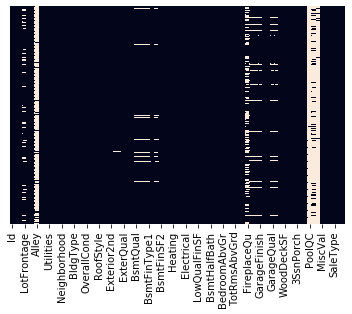

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [22]:
## Fill Missing Values 

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [23]:
df.drop(['Alley'],axis=1,inplace=True)

In [24]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [25]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [26]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [27]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [28]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [29]:
df.shape

(1460, 76)

In [30]:
df.drop(['Id'],axis=1,inplace=True)

In [31]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [32]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

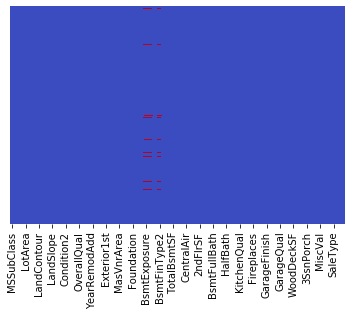

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [34]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

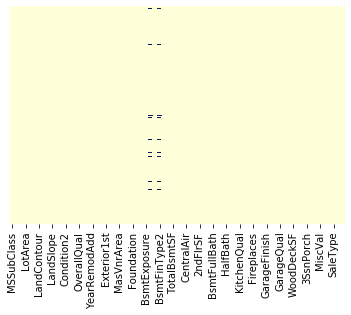

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [36]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [37]:
df.dropna(inplace=True)

In [38]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [141]:
##HAndle Categorical Features

In [142]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [143]:
len(columns)

39

In [144]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [145]:
main_df=df.copy()

In [146]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [147]:
test_df.shape

(1459, 74)

In [148]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [149]:
final_df=pd.concat([df,test_df],axis=0)

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [150]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [151]:
final_df.shape

(2881, 75)

In [152]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [153]:
final_df.shape

(2881, 235)

In [154]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [155]:
final_df.shape

(2881, 175)

In [156]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,1,1,0,0,0,0,0,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,1,0,0,0,1,0,0,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,1,1,0,0,0,0,0,0


In [157]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [158]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [159]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [160]:
df_Train.shape

(1422, 175)

In [161]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [162]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


the categorial features mode is used for integers mean is used and the values are very less so cant drop

# Prediciton and selecting the Algorithm

In [163]:
#XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

import xgboost


classifier=xgboost.XGBRegressor()

#function is assigned to a variable 

In [164]:
import xgboost
regressor=xgboost.XGBRegressor()

In [165]:
#
booster=['gbtree','gblinear']

base_score=[0.25,0.5,0.75,1]


In [166]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500] 
# means it can have 500,900,1500 decision tree

max_depth = [2, 3, 5, 10, 15]
#max depth of decision tree are assigned

booster=['gbtree','gblinear']
#booster [default= gbtree,gb linear ]
#FOR this data gbtree is used 
#which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

learning_rate=[0.05,0.1,0.15,0.20]
#specifing the different learning rates from min 0.05 to 0.2

min_child_weight=[1,2,3,4]

#this are the parameters used inside the xgboost regressor

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [167]:
from sklearn.ensemble import RandomForestClassifier
#Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.[1][2] Random decision forests correct for decision trees' habit of overfitting to their data'

from sklearn import datasets
#This package also features helpers to fetch larger datasets 

from sklearn.model_selection import RandomizedSearchCV
#randomizedsearchcv is used to predict from the data on the basis of different paramenters


In [168]:
# Set up the random search with 4-fold cross validation
random_cv1 = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

#randomized parameters are defined

#cross validation is 4 ,it has to do 4 iteration




In [169]:
#passing the values ramdom cv
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
random_cv.best_estimator_

#best_estimator is used to find the best parameter or values as per out paramters specified

In [ ]:
random_cv.best_estimator_

In [170]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)




In [171]:
regressor.fit(X_train,y_train)

C:\Users\rohit\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\rohit\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [172]:
import pickle
#Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on dis

filename = 'finalized_model.pkl'
#specification of the new file name to save the old file

pickle.dump(classifier, open(filename, 'wb'))
#copying the file usinf dump function

In [173]:

df_Test.drop(['SalePrice'],axis=1,inplace=True)

KeyError: "['SalePrice'] not found in axis"

In [175]:
df_Test.shape

(1459, 174)

In [176]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [42]:
df_Test.drop(['Saleprice'],axis=1).head()

NameError: name 'df_Test' is not defined

In [181]:
y_pred=regressor.predict(df_Test)

In [182]:
y_pred
# seeing the values

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

## Step2

In [184]:
pred.columns=['SalePrice']

NameError: name 'pred' is not defined

In [336]:
temp_df=df_Train['SalePrice'].copy()

In [337]:
temp_df.column=['SalePrice']

In [338]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [339]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [253]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [340]:
df_Test=pd.concat([df_Test,pred],axis=1)

(5, 175)

In [341]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [343]:
df_Train.shape

(2881, 175)

In [345]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# feature selection

3 Feature selection techniques that are easy to use and also gives good results

1.Univariate Selection

2.Feature Importance

3.Correlation Matrix with Heatmap



# Now I'm using univariate selection

univariate selection is a technique used to check the strongest releationship between the input and output values

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv(r'\Users\rohit\Desktop\tran.csv')
X = data.iloc[:,:]  #independent columns
y = data.iloc[:,-1]    #target column i.e sales price

SelectKBest is present in the sckit-learn lirary which tells the which are the best input or attributes with respect to the output

The  below method uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [15]:

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
#k is defined as 10 to select top 10 features 

#fit function is used to fit the data
fit = bestfeatures.fit(X,y)

In [16]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [17]:

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns) 

fit.scores_ is used to calculate the score with respect to the input and output


In [18]:

#concatition two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

 #naming the dataframe columns
featureScores.columns = ['features','Score'] 

In [19]:
featureScores

,features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
print(featureScores.nlargest(10,'Score'))  
#print the top 10 features that makes a huge impact on the output
#nlargest() is used to find the largest of the given n number of data

         features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
20    price_range    1666.666667
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166


After reading the scores we come to the dependency of price varies on the top ten features
the ram makes maximum impact on the price when compared to the other features

# Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [21]:

from sklearn.ensemble import ExtraTreesClassifier
# ExtraTreesClassifier is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result

import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
#initialization of object to funtion ExtraTreesClassifier

model.fit(X,y)
#passing variable

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
print(model.feature_importances_)
#use inbuilt class feature_importances of tree based classifiers


[0.02013017 0.0065811  0.00744437 0.00479758 0.00612174 0.00491579
 0.00937964 0.00817223 0.00818705 0.0086681  0.00731141 0.01471468
 0.01660283 0.21184717 0.00852955 0.00880511 0.00957059 0.00468126
 0.00527704 0.00580685 0.62245576]


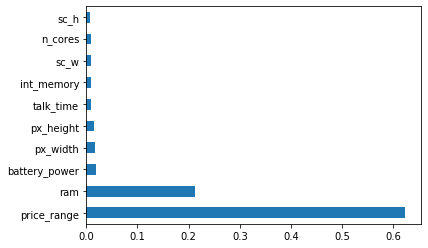

In [23]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#series function is used to pass vales

feat_importances.nlargest(10).plot(kind='barh')
#nlargest() is used to find the largest of the given n number of data
#plot is used to plot a bar graph 

plt.show()
#show is used to display the the graph

From this bar graph we came to know that ram makes the maximum impact on the price 

# Correlation Matrix with Heatmap¶

Correlation matrix states how the features are related to each other or the targeted features

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library

In [24]:
import seaborn as sns
#seaborn is an visualization library

In [25]:
corrmat = data.corr()
#corr function is used to find the corelation between the featues

top_corr_features = corrmat.index
#corelational matrix with index should be present

plt.figure(figsize=(20,20))
#initializtion of of the size of the corelational matrix

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

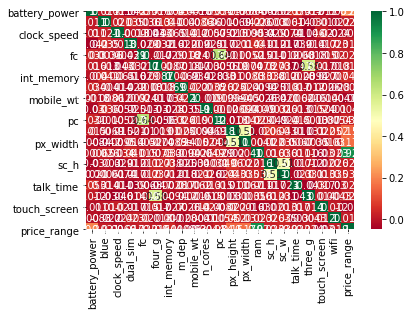

<Figure size 1440x1440 with 0 Axes>

In [28]:
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#plot heat map passing data
#specification of the colours
#annot rectangular dataset represntation



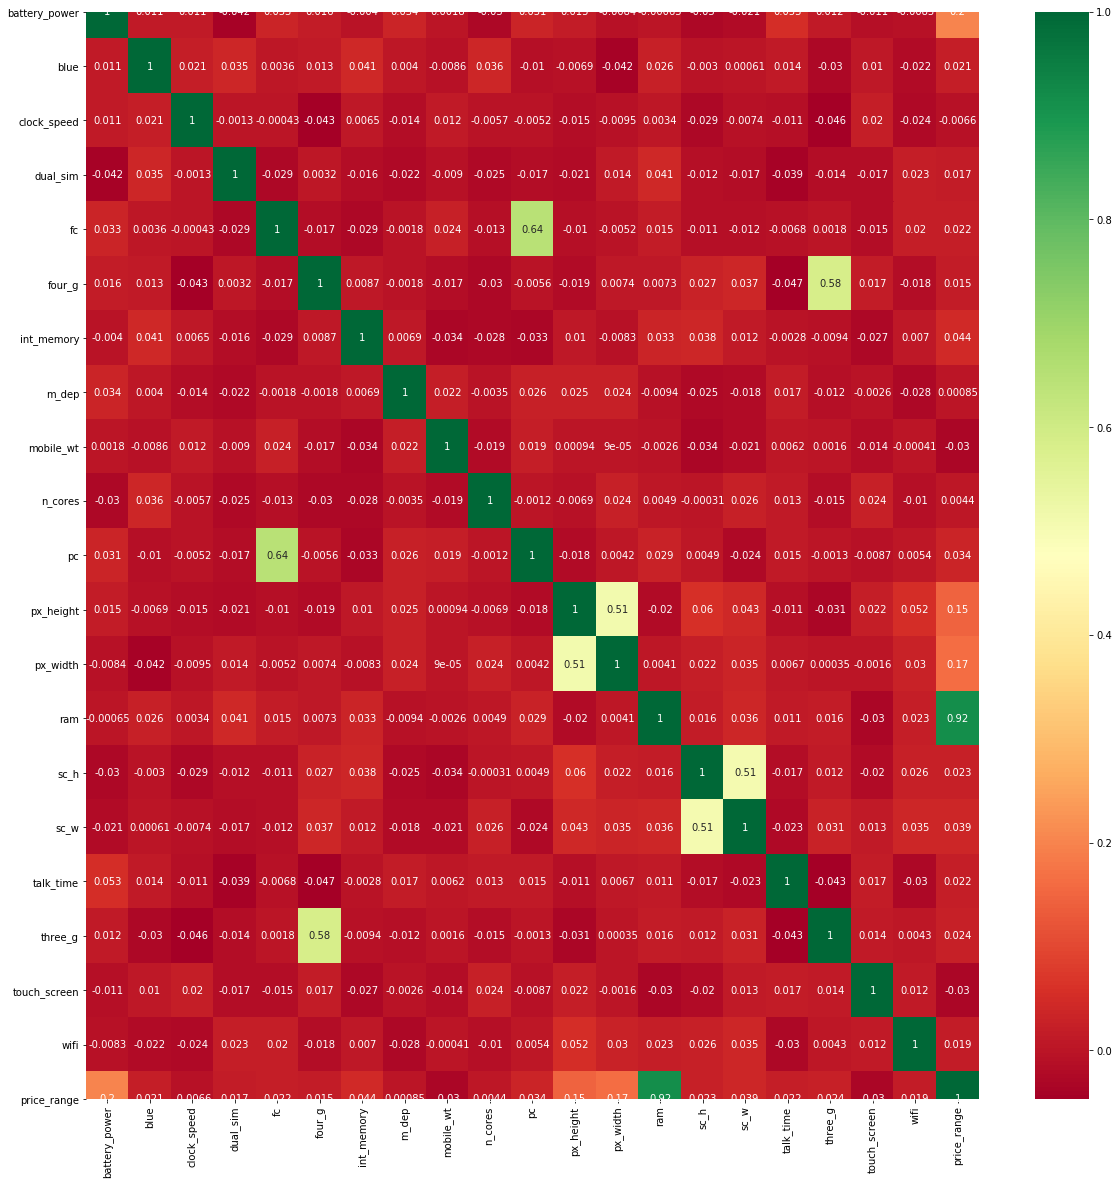

In [27]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

using the heatmap it is very easy and best way to find the corealtion between the different features 
and has better visualization

# From this heat map we come to know that the price is maximum dependent on the the ram on the phone that is 0.92

# Feature scaling

Feature scaling is a method used to normalize or Standarisation  the range of independent variables or features of data. 

# Normalization  (min-max normalization)

In this approch we will scale down the values of the features between 0 to 1

Formula for normalization 

(x – x minimum) / (x maximum – x minimum)


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
df=pd.read_csv(r'\Users\rohit\Desktop\tran.csv',header=None,usecols=[0,8,11,12,13])
df.columns=['battery','weigth','height','width','ram']

In [3]:
df.head()

,battery,weigth,height,width,ram
0,battery_power,mobile_wt,px_height,px_width,ram
1,842,188,20,756,2549
2,1021,136,905,1988,2631
3,563,145,1263,1716,2603
4,615,131,1216,1786,2769


In [4]:
from sklearn.preprocessing import MinMaxScaler

Minmax

In [5]:
scaling=MinMaxScaler()

In [8]:
scaling.fit_transform(df[['weigth','ram','battery']])

array([[0.9       , 0.61277392, 0.22778891],
       [0.46666667, 0.63468733, 0.34736139],
       [0.54166667, 0.6272047 , 0.04141617],
       ...,
       [0.23333333, 0.7485302 , 0.94188377],
       [0.54166667, 0.16381614, 0.6753507 ],
       [0.73333333, 0.9788883 , 0.00601202]])

There is a lot of value difference between the features so the values are brought between 0 and 1 
which makes easy to compare

In [7]:
df.drop(df.index[[0]],inplace=True)

# Standardization(Z-score normalization)

standardization means rescale data too have mean=0 and standard deviation=1(unit variance)

In [11]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalings=StandardScaler()

assignment of variable to  a function

In [26]:
scalings.fit_transform(df[['ram','battery']])

array([[ 0.39170341, -0.90259726],
       [ 0.46731702, -0.49513857],
       [ 0.44149774, -1.5376865 ],
       ...,
       [ 0.86013895,  1.53077336],
       [-1.15745352,  0.62252745],
       [ 1.65500399, -1.65833069]])

The values of ram and battery are reduced which makes easy for analysis

In [25]:
df.drop(df.index[[0]],inplace=True)